In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

df=pd.read_csv(url, header=0)
df.head(2)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.6,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634


In [29]:
df=df.drop(columns={"Unnamed: 0"},axis=1)
df.head(2)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634


In [30]:
df.describe(include="all")

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238,238.000000,238,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
unique,11,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71,NaN,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.205882,NaN,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,NaN,0.776533,NaN,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000


In [31]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_cm  234 non-null    float64
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       233 non-null    float64
 11  Price           238 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 22.4+ KB


In [33]:
df[['Screen_Size_cm']]=np.round(df[['Screen_Size_cm']],2)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [34]:
df["Weight_kg"]=df["Weight_kg"].replace(np.nan,df["Weight_kg"].mean())
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [35]:
# retorna o valor mais frequente
valor_mais_frequente=df["Screen_Size_cm"].value_counts().idxmax()

In [36]:
df["Screen_Size_cm"]=df["Screen_Size_cm"].replace(np.nan,valor_mais_frequente)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [37]:
df[["Screen_Size_cm","Weight_kg"]]=df[["Screen_Size_cm","Weight_kg"]].astype(float)

In [38]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [39]:
df[["Screen_Size_cm"]]=df[["Screen_Size_cm"]]/2.54
df[["Weight_kg"]]=df[["Weight_kg"]]*2.205

In [40]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837


In [41]:
df=df.rename(columns={"Screen_Size_cm":"Screen_Size_inch", "Weight_kg":"Weight_pounds"})
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837


In [42]:
caixas=["Low","Medium","High"]
bin=np.linspace(df["Price"].min(),df["Price"].max(),4)

In [43]:
df["Price-binned"]=pd.cut(df["Price"],bin,labels=caixas,include_lowest=True)

Text(0.5, 1.0, 'Preço')

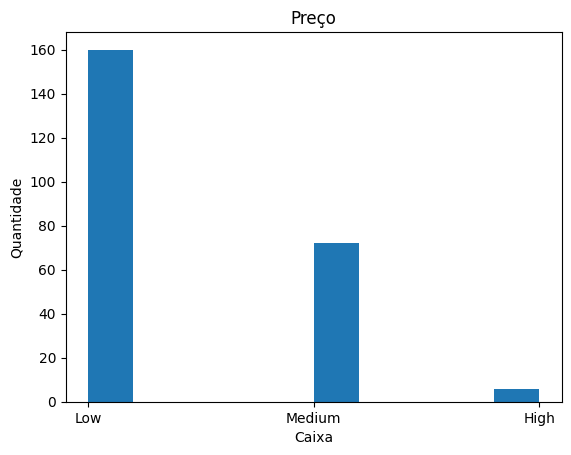

In [44]:
plt.hist(df["Price-binned"])

plt.xlabel("Caixa")
plt.ylabel("Quantidade")
plt.title("Preço")

In [45]:
df2=pd.get_dummies(df["Screen"]).astype(int)
df2

,Full HD,IPS Panel
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
233,0,1
234,1,0
235,0,1
236,1,0


In [46]:
df2=df2.rename(columns={"Full HD": "Screen-Full_HD","IPS Panel":"Screen-IPS_panel"})

In [47]:
df=pd.concat([df,df2],axis=1)

In [48]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978,Low,0,1
1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634,Low,1,0
2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946,Low,1,0
3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244,Low,0,1
4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837,Low,1,0


In [49]:
df=df.drop(columns={"Screen"})

In [50]:
df.to_csv("Phone_Dataset_clean.csv")